In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.utils import Bunch

In [2]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif
X, y = make_classification(
    n_samples=100, n_features=10, n_informative=3, n_clusters_per_class=1,
    shuffle=False, random_state=4
)
mutual_info_classif(X, y)

array([0.16021196, 0.39814807, 0.38840337, 0.14476594, 0.16593686,
       0.01075193, 0.01459115, 0.01923556, 0.04785472, 0.        ])

In [3]:
df = pd.read_csv("/home/athyrson/Code/Data/Raw Data/German/german_raw.csv")

In [4]:
X = df.drop(columns=["GoodCustomer", "Gender", "PurposeOfLoan"])
y = df["GoodCustomer"]

In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)


In [6]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

def compute_mutual_information(X, y, return_as="df"):
    """
    Computes mutual information (MI) between features and the target variable.
    
    Parameters:
        X (pd.DataFrame or np.array): Feature matrix.
        y (pd.Series or np.array): Target variable.
        return_as (str): 'df' to return as DataFrame, 'series' to return as Series.
    
    Returns:
        pd.DataFrame or pd.Series: Mutual information scores for each feature.
    """
    mi_scores = mutual_info_classif(X, y, discrete_features='auto', n_neighbors=3, random_state=42)
    
    if return_as == "df":
        return pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores}).sort_values(by="Mutual Information", ascending=False)
    elif return_as == "series":
        return pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
    else:
        raise ValueError("return_as must be 'df' or 'series'.")



In [7]:
# Compute MI and return as DataFrame
mi_df = compute_mutual_information(X_train, y_train, return_as="df")
mi_df


,Feature,Mutual Information
23,Unemployed,0.042003
3,LoanDuration,0.040779
16,CriticalAccountOrLoansElsewhere,0.035728
11,CheckingAccountBalance_geq_200,0.026646
14,MissedPayments,0.018545
4,LoanAmount,0.016870
12,SavingsAccountBalance_geq_100,0.014104
9,HasTelephone,0.014099
19,HasCoapplicant,0.011949
17,OtherLoansAtBank,0.010903


In [8]:
import numpy as np
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance


In [9]:
# Compute Pearson correlation with target
corr_scores = X_train.corrwith(pd.Series(y_train))

# Create DataFrame with features and correlations
corr_df = pd.DataFrame({'Feature': X.columns, 'Correlation': corr_scores.abs()}
                       ).sort_values(by="Correlation", ascending=False)

# Reset index without keeping the old index as a column
corr_df.reset_index(drop=True, inplace=True)

corr_df

,Feature,Correlation
0,LoanDuration,0.223492
1,CriticalAccountOrLoansElsewhere,0.187303
2,LoanAmount,0.168680
3,OwnsHouse,0.151383
4,NoCurrentLoan,0.135735
5,SavingsAccountBalance_geq_500,0.110627
6,YearsAtCurrentJob_lt_1,0.108264
7,YearsAtCurrentJob_geq_4,0.101388
8,RentsHouse,0.099636
9,Age,0.097674


In [40]:
# Train a Random Forest model

model = xgboost.XGBRegressor().fit(X_train, y_train)
model.fit(X_train, y_train)

# Compute Permutation Importance
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)

perm_df = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': perm_importance.importances_mean}).sort_values(by="Permutation Importance", ascending=False)

perm_df


,Feature,Permutation Importance
4,LoanAmount,0.665425
3,LoanDuration,0.457514
2,Age,0.336894
16,CriticalAccountOrLoansElsewhere,0.103857
21,OwnsHouse,0.078406
5,LoanRateAsPercentOfIncome,0.067346
15,NoCurrentLoan,0.058835
6,YearsAtCurrentHome,0.057083
1,Single,0.054003
9,HasTelephone,0.051243


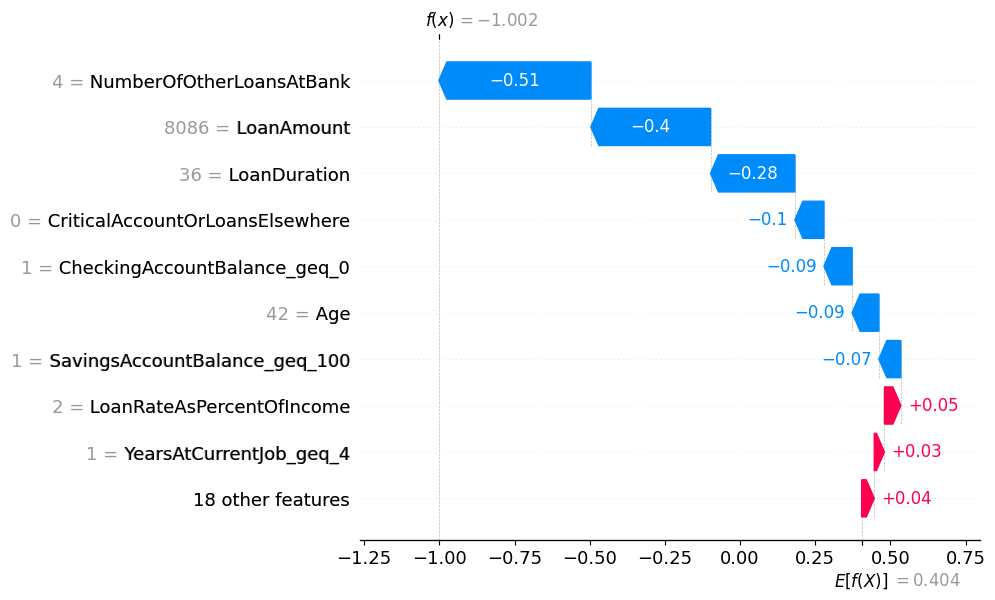

In [41]:
import xgboost

import shap

# train an XGBoost model

model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [38]:
feature_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame with feature names
shap_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'SHAP Importance': feature_importance
})

# Sort features by importance (descending)
shap_df = shap_df.sort_values(by="SHAP Importance", ascending=False)
shap_df

,Feature,SHAP Importance
4,LoanAmount,0.233833
3,LoanDuration,0.179932
2,Age,0.127928
16,CriticalAccountOrLoansElsewhere,0.119460
21,OwnsHouse,0.074324
9,HasTelephone,0.064969
1,Single,0.060607
5,LoanRateAsPercentOfIncome,0.049587
6,YearsAtCurrentHome,0.047327
7,NumberOfOtherLoansAtBank,0.045399


In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

# Create a DataFrame with feature names and importances
feature_importances = ebm.explain_global().data()['scores'][:X_train.shape[1]]

ebm_df = pd.DataFrame({'Feature': X_train.columns, 'EBM Importance': feature_importances})

# Sort by importance
ebm_df = ebm_df.sort_values(by="EBM Importance", ascending=False)

ebm_df.round(3)

In [87]:
explainers_list = [mi_df, corr_df, perm_df, shap_df, ebm_df]

explainers_list = [i.set_index('Feature').sort_index() for i in explainers_list]

In [89]:
combined_df = pd.concat(explainers_list, axis=1)
combined_df.round(3)

,Mutual Information,Correlation,Permutation Importance,SHAP Importance,EBM Importance
Feature,,,,,
Age,0.002,0.098,0.337,0.128,0.068
CheckingAccountBalance_geq_0,0.000,0.068,0.034,0.028,0.080
CheckingAccountBalance_geq_200,0.027,0.083,0.024,0.023,0.067
CriticalAccountOrLoansElsewhere,0.036,0.187,0.104,0.119,0.223
ForeignWorker,0.000,0.075,0.006,0.012,0.044
HasCoapplicant,0.012,0.069,0.018,0.015,0.035
HasGuarantor,0.000,0.049,0.010,0.015,0.042
HasTelephone,0.014,0.036,0.051,0.065,0.085
JobClassIsSkilled,0.006,0.023,0.027,0.025,0.019


In [91]:
combined_df.corr().round(3)

,Mutual Information,Correlation,Permutation Importance,SHAP Importance,EBM Importance
Mutual Information,1.000,0.302,0.317,0.368,0.434
Correlation,0.302,1.000,0.590,0.687,0.880
Permutation Importance,0.317,0.590,1.000,0.949,0.710
SHAP Importance,0.368,0.687,0.949,1.000,0.832
EBM Importance,0.434,0.880,0.710,0.832,1.000


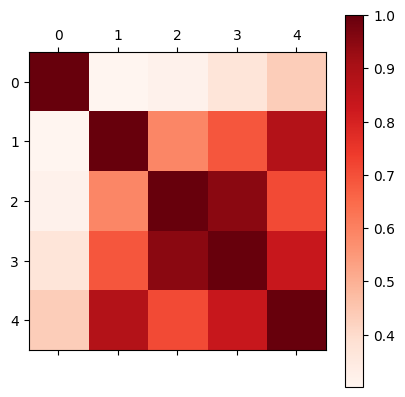

In [93]:
plt.matshow(combined_df.corr().round(3), cmap="Reds")
plt.colorbar()
plt.show()